### Outliers finding (Z-score)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df=sns.load_dfset("penguins")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
df['bill_depth_mm'].describe()

count    333.000000
mean      17.164865
std        1.969235
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

<Axes: ylabel='bill_depth_mm'>

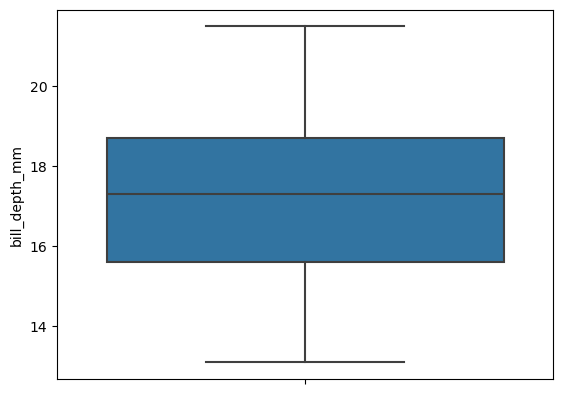

In [ ]:
sns.boxplot(y='bill_depth_mm', df=df)

In [9]:
df=sns.load_dataset("titanic")

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.dropna(inplace=True) 

In [16]:
df['fare'].describe()

count    182.000000
mean      78.919735
std       76.490774
min        0.000000
25%       29.700000
50%       57.000000
75%       90.000000
max      512.329200
Name: fare, dtype: float64

<Axes: ylabel='fare'>

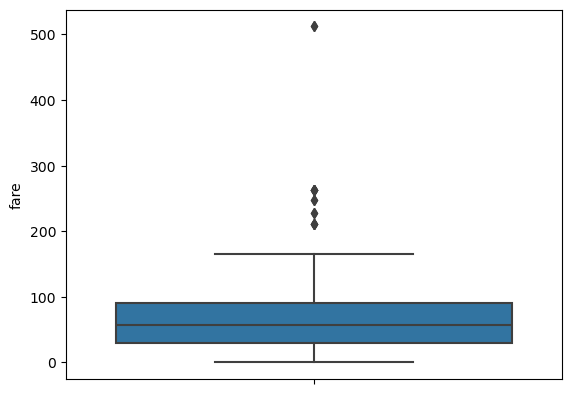

In [ ]:
sns.boxplot(y='fare', df=df)

In [18]:
mean=np.mean(df['fare'])

In [19]:
std=np.std(df['fare'])

In [20]:
df['z_score']=(df['fare']-mean)/std

In [22]:
df['z_score'].max()

5.68179738065627

In [23]:
df['z_score'].min()

-1.0346011818458682

In [25]:
print(f"Here are the outliers based on the z-score threshold, 3:\n {df[df['z_score'] > 3]}")

Here are the outliers based on the z-score threshold, 3:
      survived  pclass   sex   age  sibsp  parch      fare embarked  class  \
679         1       1  male  36.0      0      1  512.3292        C  First   
737         1       1  male  35.0      0      0  512.3292        C  First   

     who  adult_male deck embark_town alive  alone   z_score  
679  man        True    B   Cherbourg   yes  False  5.681797  
737  man        True    B   Cherbourg   yes   True  5.681797  


In [26]:
df[df['z_score'] > 3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,z_score
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False,5.681797
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True,5.681797


In [27]:
df = df[df['Z-Score'] <= 3]

KeyError: 'Z-Score'

In [28]:
df = df[df['z_score'] <= 3]

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,z_score
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,-0.100110
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,-0.338485
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,-0.354708
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,-0.815672
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,-0.686543
